# Exploring Feature Types

In this notebook, we explore [Titanic dataset](https://www.kaggle.com/hesh97/titanicdataset-traincsv), containing 891 records and 12 features. One step at a time, we'll inspect continuous and categorical feature types with the help of visualizations. 

Firstly, we import necessary libraries and load the data using Pandas.

In [ ]:
# Importing Pandas, Matplotlib and Seaborn libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,9)})
sns.set_style('ticks')
plt.rc('axes.spines', top = False, right = False)

Take a look at the first five rows and read through the below explanation to understand what each feature represents.

- passengerID
- Name
- Sex
- Age
- Survived - not survived = 0, survived = 1, (target feature)
- Pclass - ticket class = 1st, 2nd, 3rd
- SibSp - number of siblings or spouses aboard the Titanic
- Parch - number of parents or children aboard the Titanic
- Ticket - ticket number
- Fare - ticket fare
- Cabin - cabin number
- Embarked - port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
# Load the dataset 'Data/titanic_data.csv' and store it to variable data
data = pd.read_csv('titanic_data.csv')
# Get first 10 rows of the data
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Numerical Features

## 1.1 Unbounded continuous type
The numerical feature  'Fare' represents the price that a passenger paid for a ticket. The price starts at zero and continuously increases within a specific range. This feature is an example of **unbounded continuous** feature type because the fare can take any value, including decimal numbers with a fractional part. 

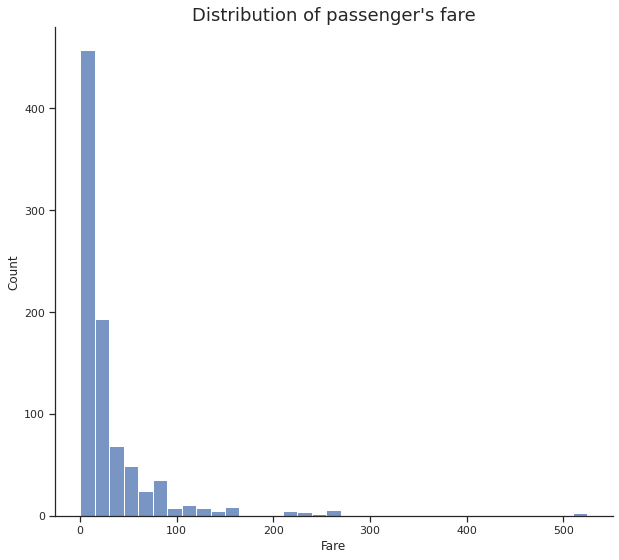

In [ ]:
# Creating a histogram of 'Fare' 
sns.histplot(data = data, x = 'Fare', binwidth = 15)
plt.title("Distribution of passenger's fare", fontsize = 18);

The other numerical continuous feature is 'Age'. The other characteristic of continuous feature is that it **can be measured**, as we can measure the age in years, for example. Let´s create a boxplot to see its distribution. 

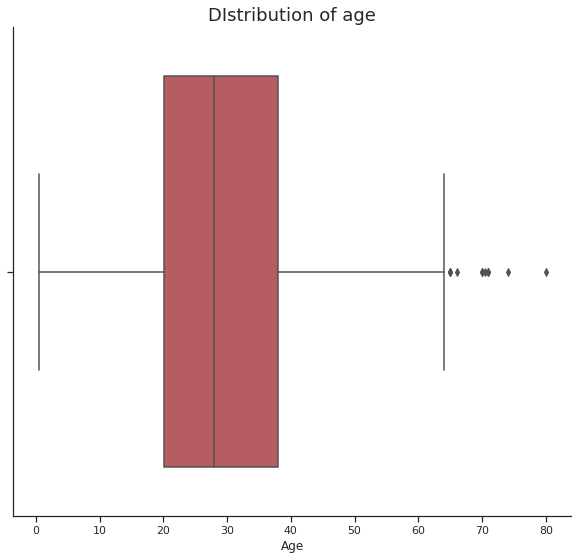

In [ ]:
# Creating a boxplot of 'Age'
sns.boxplot(data=data, x = 'Age',color ='r')
plt.title('DIstribution of age', fontsize = 18);

## 1.2 Unbounded discrete type

The feature 'SibSp' represents family relations such as siblings or spouses. We can treat this feature as the **discrete** since the number is always some "isolated" value - logically, you can't report that you have 2.5 sisters. 

If we visualize such a discrete feature with a count plot, each bar represents a unique integer value with a respective count of records. There is no overlapping between these fixed values because they are counted, not measured.

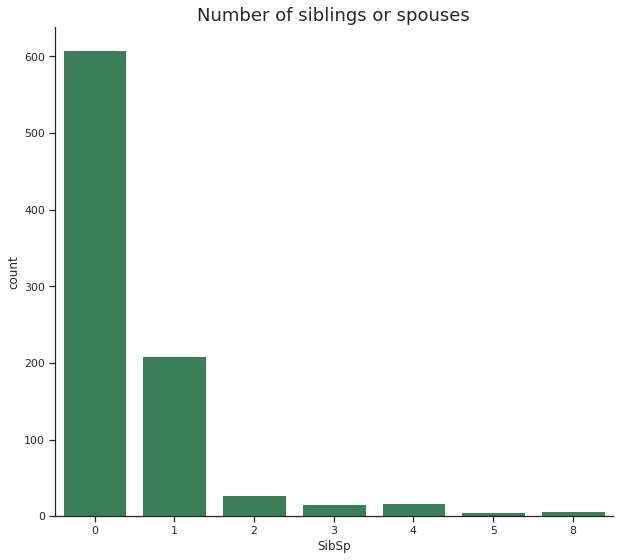

In [ ]:
# Creating a countplot of 'SibSp'
sns.countplot(data = data, x = 'SibSp', color = 'seagreen')
plt.title('Number of siblings or spouses', fontsize = 18);

Imagine a dataset with a feature called 'rainfall' containing daily measurements of precipitation in millimeters. What would you say is a type of feature 'rainfall'? Discrete or continuous? Type your answer in lowercase before unhiding the code cell below. 




In [ ]:
#@title TASK: Hit the run button for code execution, type your answer and hit ENTER

while True:
  type_answer = input('What is your answer? ')
  if type_answer == 'continuous':
    print('That´s correct!')
  elif type_answer == 'discrete':
    print('Well, your answer is incorrect, try again.')
  else:
    print('Choose either continuous or discrete, please.') 
  break

# 2. Categorical Features

Categorical features contain distinct categories (also called labels), while each category can only take one limited and fixed value. As you saw in the preceding video, there are 2  'subtypes' based on whether their values have ordering or not. 

## 2.1 Ordinal categorical features

Let´s take as an example 'Pclass' feature that holds information about three ticket classes that passengers paid for, namely 1st, 2nd, and 3rd class. These travel classes reflect the socioeconomic status of the passengers aboard, and they have a specific order. It would be nice to introduce the order of values into the predictive model as additional information to help the model make better predictions. 

Looking at the below graph, we can see that the majority of passengers purchased third-class tickets. We can also assume that only the wealthiest passengers aboard could have afforded first-class tickets. In further exploration, you could ask interesting questions about this feature, such as: "Were the wealthiest passengers traveling first-class more likely to survive? Or the ticket class is of no importance in terms of survival?"


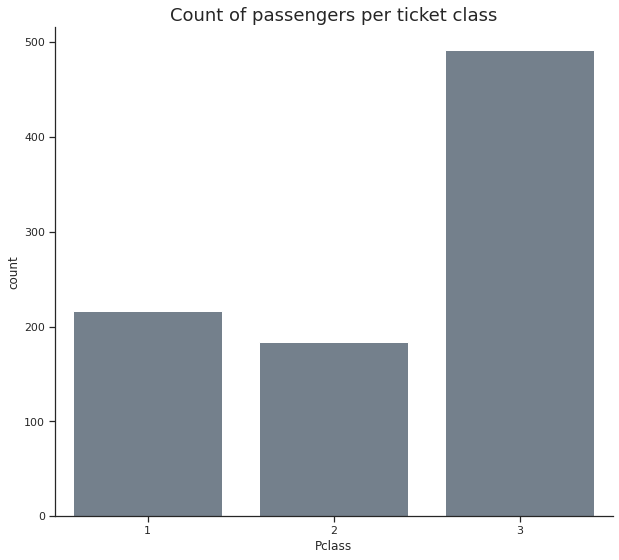

In [ ]:
# Creating a countplot of 'Pclass'
sns.countplot(data = data, x = 'Pclass', color = 'slategrey')
plt.title('Count of passengers per ticket class', fontsize = 18);

In [ ]:
# TASK >>> Can you think of another examples of categorical feature with natural ordering ?


## 2.2 Non-ordinal categorical features
The second 'subtype' of categorical features is the non-ordinal type. Let´s take as an example the feature 'Embarked'. It contains information about the port of embarkation, namely Cherbourg, Queenstown, and Southampton. So these are specific categories without any order or relationship among them.



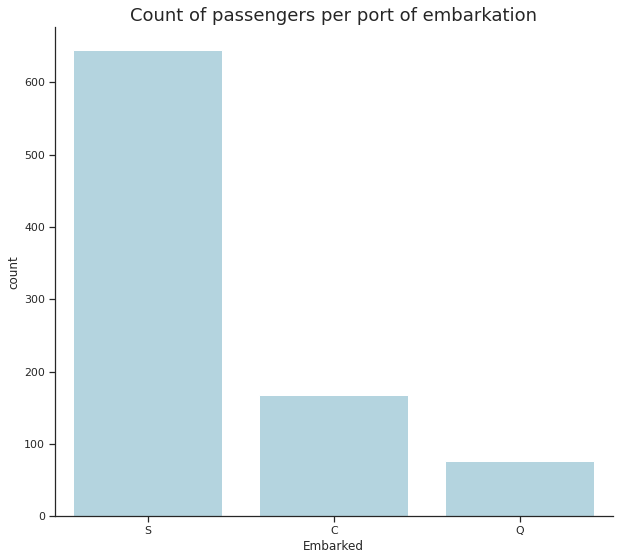

In [ ]:
# Creating a countplot of 'Embarked'
sns.countplot(data = data, x = 'Embarked', color = 'lightblue')
plt.title('Count of passengers per port of embarkation', fontsize = 18);

In [ ]:
# LET`S PLAY A GAME: Look around your room and think of examples that could have non-ordinal categories
# For example, I have a cup of coffee in front of me: imaginary, categorical feature could be a type of coffee beans: Arabica, Robusta, and Liberica.

## 2.3 Binary categorical features

Binary categorical features are the special type of categorical features and take only 2 values. The example can be feature 'Survived' in our dataset that contains 2 values: 1 as a label for passengers who survived and 0 for those who didn´t. Looking at the below pie chart, we can see that only 38.4% of passengers survived overall. It could be interesting to investigate survival rates based on gender or per ticket classes.

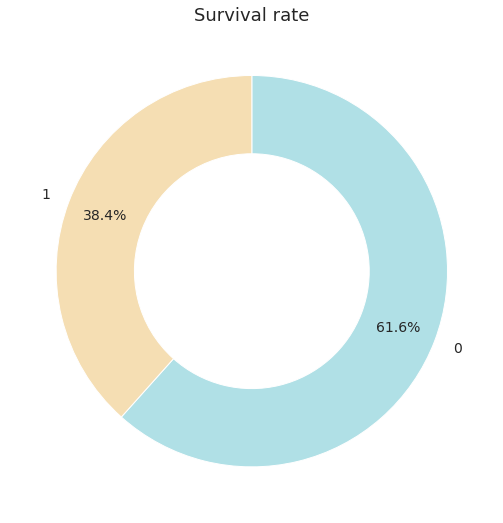

In [ ]:
# Creating a pie plot
colors = ['powderblue','wheat']
data['Survived'].value_counts(normalize = True).mul(100).plot(kind = 'pie',autopct='%1.1f%%',
                                                              startangle = 90, counterclock = False, 
                                                              textprops={'fontsize': 14}, pctdistance=0.8, 
                                                              wedgeprops = {'width':0.4}, colors = colors)
plt.title('Survival rate', fontsize = 18)
plt.ylabel('');

In [ ]:
# QUESTIONS: Which feature of the Titanic dataset could we change into a binary feature containing only 2 values, so zeros and ones?
#            What do you think is a type of 'Cabin' feature in the dataset?